In [4]:
import torch

from torch import nn

torch.__version__

'2.1.0+cu121'

In [5]:
device = 'cuda'  if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [6]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory exists")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents = True, exist_ok = True)

  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

    # Unzip pizza, steak, sushi data
  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)


Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [7]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are  {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

In [8]:
walk_through_dir(image_path)

There are  2 directories and 0 images in 'data/pizza_steak_sushi' 
There are  3 directories and 0 images in 'data/pizza_steak_sushi/train' 
There are  0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi' 
There are  0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza' 
There are  0 directories and 75 images in 'data/pizza_steak_sushi/train/steak' 
There are  3 directories and 0 images in 'data/pizza_steak_sushi/test' 
There are  0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi' 
There are  0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza' 
There are  0 directories and 19 images in 'data/pizza_steak_sushi/test/steak' 


In [9]:
train_dir = image_path / "train"
test_dir = image_path / "test"


512
512
sushi
300


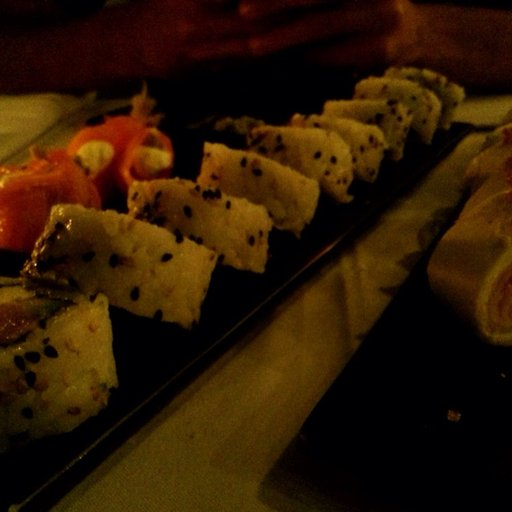

In [37]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)



print(img.height)
print(img.width)
print(image_class)
print(len(image_path_list))
img

Text(0.5, 1.0, 'sushi')

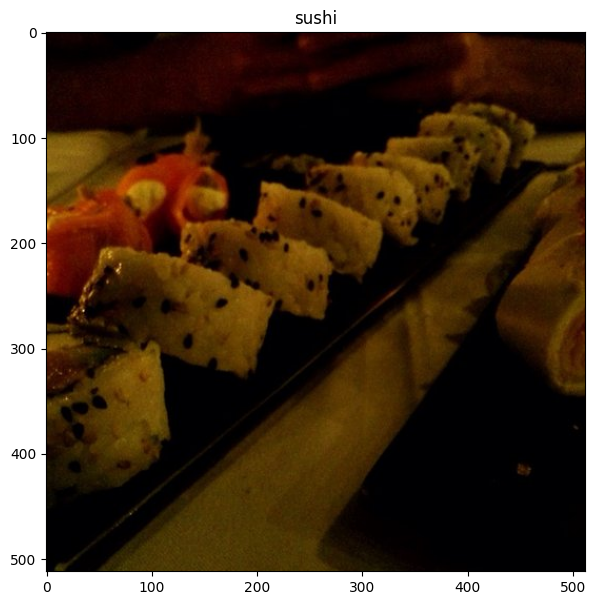

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(img)
plt.title(image_class)

In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [13]:
data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

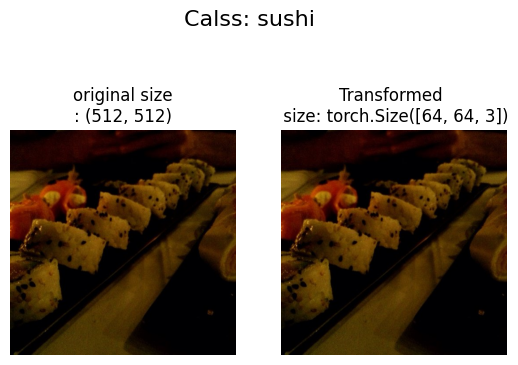

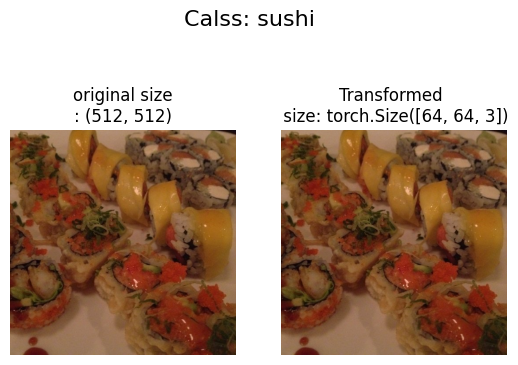

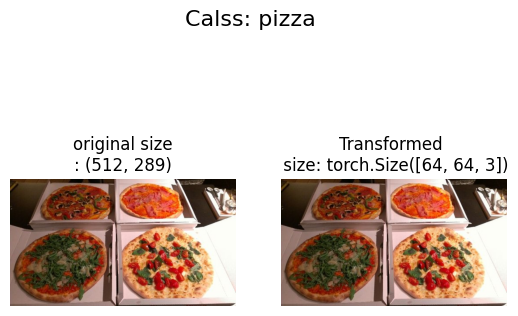

In [14]:
def plot_transformed_images(image_paths, transform, n = 3, seed = 42):
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k = n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"original size\n: {f.size}")
      ax[0].axis('off')

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(f)
      ax[1].set_title(f"Transformed \n size: {transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f'Calss: {image_path.parent.stem}', fontsize = 16)


plot_transformed_images(image_path_list, data_transform, n = 3)


In [15]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform= data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform
                                 )


print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [16]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [17]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
len(train_data), len(test_data)

(225, 75)

Text(0.5, 1.0, 'pizza')

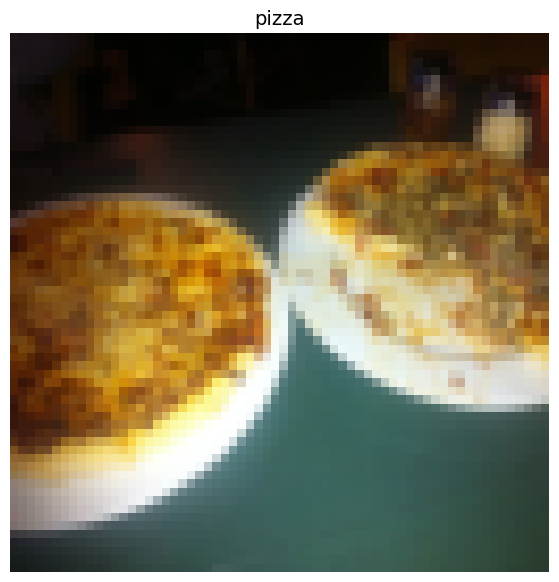

In [19]:
img, label = train_data[0][0], train_data[0][1]
img_permute = img#img.permute(1,2,0)

plt.figure(figsize=(12,7))
#plt.imshow(img.permute(1,2,0))
plt.imshow(img.permute(1,2,0))
plt.axis('off')
plt.title(class_names[label], fontsize = 14)



In [20]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 1,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a3bc6d7a950>,
 <torch.utils.data.dataloader.DataLoader at 0x7a3bc6d7a980>)

In [21]:
img,label = next(iter(train_dataloader))

print(f"Image Shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Lable shape: {label.shape}")

Image Shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Lable shape: torch.Size([1])


In [22]:
train_dir
classes = sorted(entry.name for entry in os.scandir(train_dir) if entry.is_dir())

print(classes)


['pizza', 'steak', 'sushi']


In [23]:
from typing import List

In [24]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes : List[str] = None,
                          n: int = 10,
                          display_shape: bool = None,
                          seed: int = None):
  if n>10:
    n=10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display")
  if seed:
    random.seed(seed)
  random_sample_idx  = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize = (16,8))

  for i, targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1, n, i +1)
    plt.imshow(targ_image_adjust)
    plt.axis('off')
    if classes:
      title = f"class:{classes[targ_label]}"
      if display_shape:
        title = title + f"\n shape: {targ_image_adjust.shape}"

      plt.title(title)

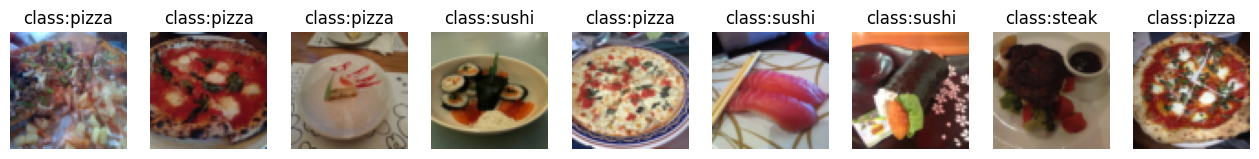

In [25]:
display_random_images(train_data,
                      n=9,
                      classes = class_names,
                      seed = None)

In [26]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

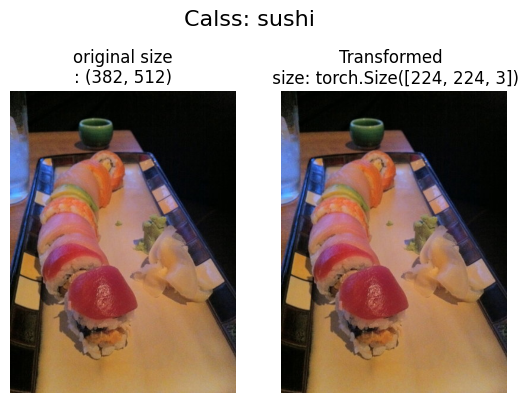

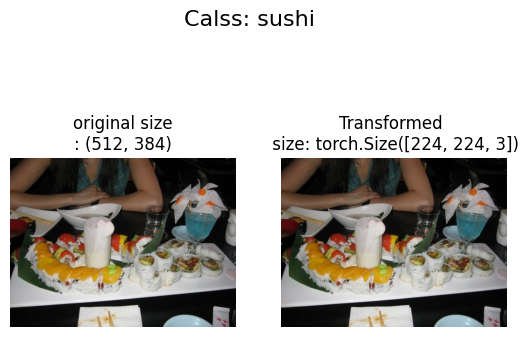

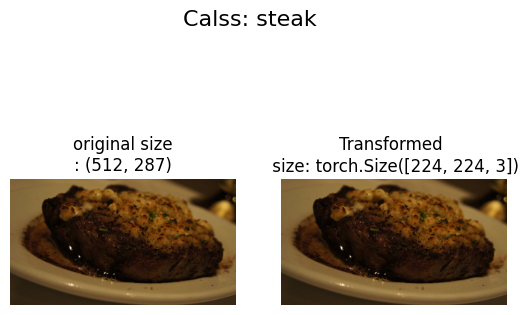

In [27]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transforms,
    n = 3,
    seed = None
)

In [28]:
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [29]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir, transform = simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform = simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     shuffle = True,
                                     num_workers = NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle  = False,
                                    num_workers = NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple


(<torch.utils.data.dataloader.DataLoader at 0x7a3bc6aa73a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a3bc6aa5420>)

In [30]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride =1 ,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding =1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  padding =1 ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*16*16,
                  out_features = output_shape)

    )

  def forward(self,x):
    return self.classifier(self.conv_block2(self.conv_block1(x)))

torch.manual_seed(42)

model_0 = TinyVGG(input_shape = 3, hidden_units = 10,output_shape = len(train_data.classes)).to(device)

model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [31]:
img_batch, label_batch = next(iter(train_dataloader_simple))

img_single, lable_single = img_batch[0].unsqueeze(dim=0),label_batch[0]

print(f"Single image shape: {img_single.shape} \n")

model_0.eval()
with torch.inference_mode():
  pred = model_0(img_single.to(device))

print(f"Output logits: \n {pred}")
print(f"Output pred prob: \n {torch.softmax(pred,dim =1)}")
print(f"Output pred label: \n {torch.argmax(torch.softmax(pred,dim =1), dim = 1)} \n")
print(f"Actual label: {lable_single}")


Single image shape: torch.Size([1, 3, 64, 64]) 

Output logits: 
 tensor([[0.0578, 0.0634, 0.0351]])
Output pred prob: 
 tensor([[0.3352, 0.3371, 0.3277]])
Output pred label: 
 tensor([1]) 

Actual label: 2


In [32]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3, 64,64])




Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [44]:
 def train_step(model: torch.nn.Module,
                dataloader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer):
   model.train()
   train_loss, train_acc = 0,0

   for batch, (X,y)  in enumerate(dataloader):
    X,y = X.to(device), y.to(device)

    y_pred = model(X)

    loss =loss_fn(y_pred,y)

    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred,dim =1),dim = 1)

    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

   train_loss = train_loss/len(dataloader) *100
   train_acc = train_acc/len(dataloader) *100
   return train_loss, train_acc

In [43]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader) *100
    test_acc = test_acc / len(dataloader) *100
    return test_loss, test_acc

In [35]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader : torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer : torch.optim.Optimizer,
          loss_fn : torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5
          ):
  results = {"train_loss" : [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
             }
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer)
    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn)

    print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 110.7359 | train_acc: 41.7969 | test_loss: 110.6134 | test_acc: 26.0417
Epoch: 2 | train_loss: 112.6535 | train_acc: 30.4688 | test_loss: 110.1534 | test_acc: 26.0417
Epoch: 3 | train_loss: 109.5023 | train_acc: 31.2500 | test_loss: 109.6738 | test_acc: 38.4470
Epoch: 4 | train_loss: 109.2314 | train_acc: 42.5781 | test_loss: 107.1424 | test_acc: 60.4167
Epoch: 5 | train_loss: 105.2015 | train_acc: 56.2500 | test_loss: 103.3910 | test_acc: 61.8371
Epoch: 6 | train_loss: 97.2798 | train_acc: 56.6406 | test_loss: 116.3030 | test_acc: 32.2917
Epoch: 7 | train_loss: 103.0762 | train_acc: 46.4844 | test_loss: 91.3995 | test_acc: 55.3030
Epoch: 8 | train_loss: 90.3356 | train_acc: 60.1562 | test_loss: 108.2237 | test_acc: 31.2500
Epoch: 9 | train_loss: 88.4176 | train_acc: 48.0469 | test_loss: 99.0128 | test_acc: 36.3636
Epoch: 10 | train_loss: 94.1316 | train_acc: 50.3906 | test_loss: 97.5081 | test_acc: 48.2955
Epoch: 11 | train_loss: 87.7232 | train_acc: 58.2031 | t